In [1]:
#basically, in here, we will be adding convolutional layer with ANN model
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Tensorflow is ML library
#keras is Neural network library
import tensorflow as tf
from tensorflow import keras

In [3]:
#to import fashion_mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() 

In [4]:
#This list is for our reference whenver we get a class label
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [5]:
#for CNN to work, we need 3 layers in an image, thats why we r reshaping it. We have just added the color channel for our image
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [6]:
#Now comes the normarlization of the data, which is the rescaling of our data, 
#to make them, approx. of same scale

#As the color channels are in the range of 0-255(even for grayscale image), hence we will be dividing by 255, so that 
#all the data are in the range of [0,1]
x_train_n=x_train/255
x_test_n=x_test/255

In [7]:
x_valid,x_train=x_train[:5000], x_train[5000:]
y_valid,y_train=y_train[:5000], y_train[5000:]

In [8]:
#seed is used to specify that, the random value being produced by the np.random and tf.random
#should always be 42, instad of any other random value
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model=keras.models.Sequential()

#kernel_size is basically filter size that we will be using
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))

#flatten layer is 1-D array
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [37]:
#for multi-label classification problem, we use loss function as crossentropy

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [42]:
#now comes training the model
model_history=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_valid,y_valid))

Epoch 1/20
860/860 [==============================] - 20s 23ms/step - loss: 0.4347 - accuracy: 0.8365 - val_loss: 0.4822 - val_accuracy: 0.8160
Epoch 2/20
860/860 [==============================] - 20s 23ms/step - loss: 0.4241 - accuracy: 0.8402 - val_loss: 0.4744 - val_accuracy: 0.8202
Epoch 3/20
860/860 [==============================] - 20s 23ms/step - loss: 0.4140 - accuracy: 0.8429 - val_loss: 0.5116 - val_accuracy: 0.8186
Epoch 4/20
860/860 [==============================] - 20s 23ms/step - loss: 0.4033 - accuracy: 0.8476 - val_loss: 0.4518 - val_accuracy: 0.8392
Epoch 5/20
860/860 [==============================] - 20s 24ms/step - loss: 0.3988 - accuracy: 0.8488 - val_loss: 0.4370 - val_accuracy: 0.8380
Epoch 6/20
860/860 [==============================] - 21s 24ms/step - loss: 0.3913 - accuracy: 0.8516 - val_loss: 0.4275 - val_accuracy: 0.8476
Epoch 7/20
860/860 [==============================] - 20s 24ms/step - loss: 0.3822 - accuracy: 0.8537 - val_loss: 0.4365 - val_accuracy:

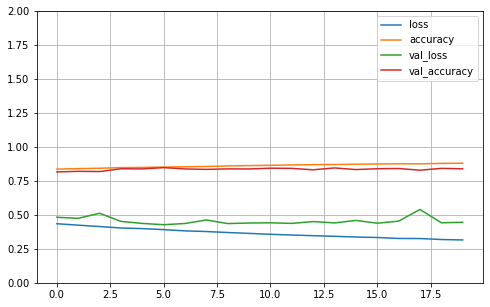

In [43]:
#to view how these loss, accuracy, validation loss and validation accuracy are doing
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [44]:
#to see how our model is performing on test data
ev=model.evaluate(x_test_n,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3672 - accuracy: 0.6040


In [45]:
ev

[1.3672428131103516, 0.6039999723434448]

In [46]:
x_new=x_test[:3]

In [47]:
y_pred=model.predict_classes(x_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [48]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


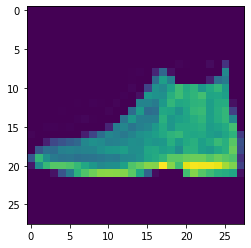

In [49]:
#before plotting, we convert the image to 2D form again
print(plt.imshow(x_test[0].reshape(28,28)))

In [51]:
keras.backend.clear_session()

In [52]:
del model